<a href="https://colab.research.google.com/github/Rezi277/Praktikum05-ML/blob/main/Praktikum05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("../content/drive/MyDrive/Latihan-2.ML/Praktikum04.ML/Data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
# cekmissing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
# Cetak duplicate
df.duplicated().sum()

np.int64(7308)

In [ ]:
# Menghapus data dulpikat
# Reload the dataframe to ensure it's a pandas DataFrame
df = pd.read_csv("../content/drive/MyDrive/Latihan-2.ML/Praktikum04.ML/Data/stunting_wasting_dataset.csv")
df = df.drop_duplicates()

In [ ]:
# Cetak duplicated ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename(columns={
    'Jenis Kelamin': 'Jenis_Kelamin',
    'Umur (bulan)': 'Umur_bulan',
    'Tinggi Badan (cm)': 'tingg_cm',
    'Berat Badan (kg)': 'berat_kg',
    'Stunting': 'stunting',
    'Wasting': 'wasting'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis_Kelamin  92692 non-null  object 
 1   Umur_bulan     92692 non-null  int64  
 2   tingg_cm       92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


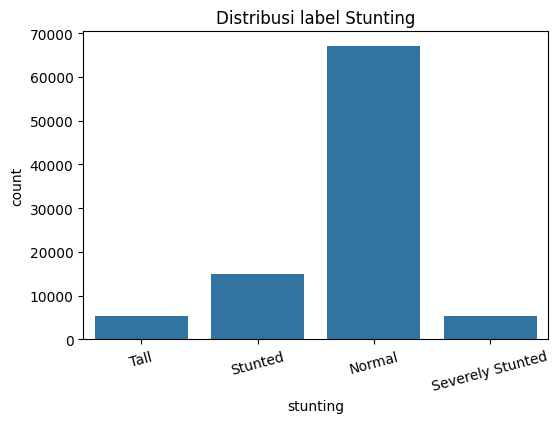

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] = stunting_cat.cat.codes

# fitur kategorikal lain (jenis_kelamin, wasting)
for col in ['Jenis_Kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,Jenis_Kelamin,Umur_bulan,tingg_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


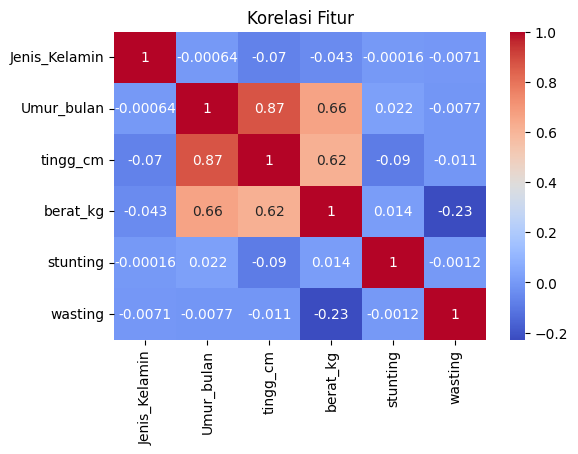

In [ ]:
# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
# Memilih fitur dan target
feature_cols = ['Umur_bulan', 'tingg_cm', 'berat_kg', 'wasting']
x = df[feature_cols]
y = df['stunting']

In [ ]:
# Membagikan dataset
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
len(x_train), len(X_test)

(74153, 18539)

In [ ]:
# Membuat model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Evaluasi
y_pred = dt.predict(X_test)

# Get the original string categories for 'stunting'
original_stunting_classes = pd.read_csv("../content/drive/MyDrive/Latihan-2.ML/Praktikum04.ML/Data/stunting_wasting_dataset.csv")['Stunting'].unique().tolist()

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=original_stunting_classes))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

            Tall       0.80      0.96      0.88     13411
         Stunted       1.00      0.02      0.05      1067
          Normal       0.59      0.45      0.51      3008
Severely Stunted       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



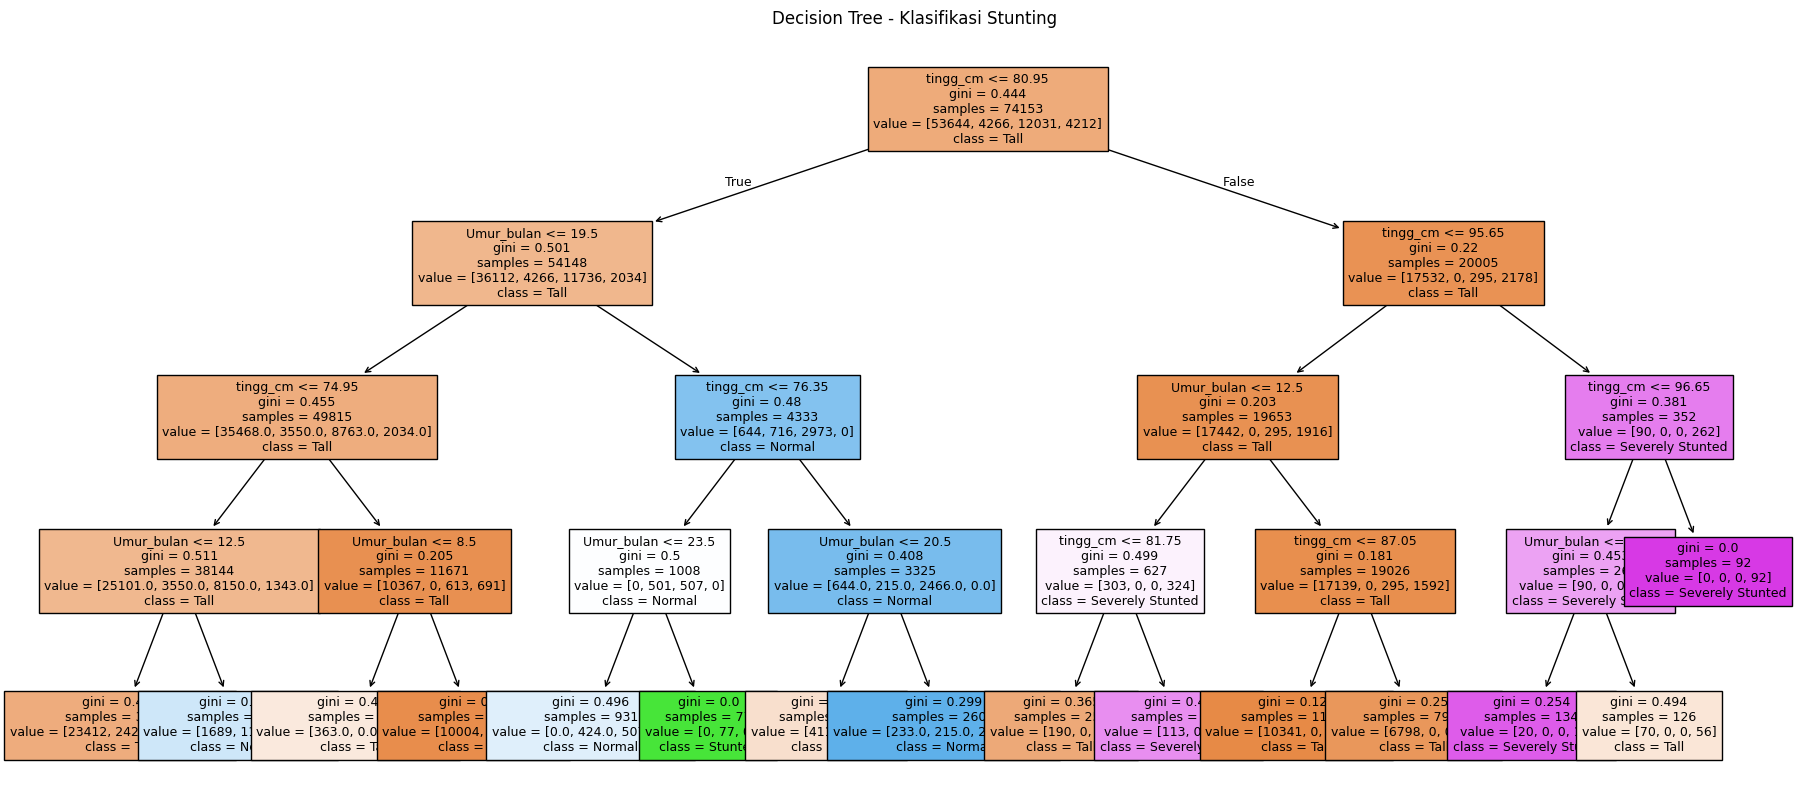

In [ ]:
# Visualisasi model
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=original_stunting_classes,
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

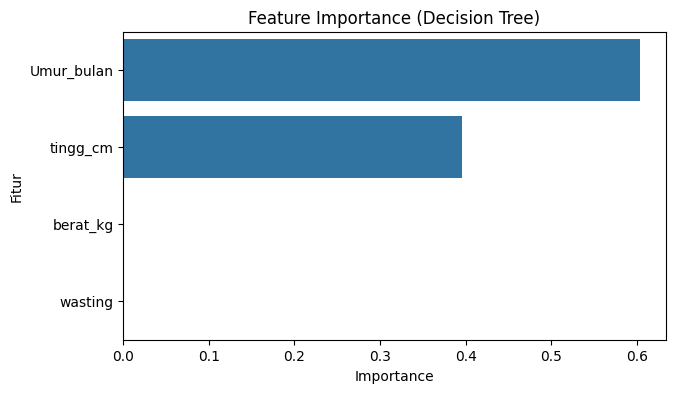

,0
Umur_bulan,0.603752
tingg_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp


In [ ]:
scores = {}

# Uji berbagai nilai max_depth dari 2 sampai 9
for d in range(2, 10):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(x_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d] * 100, 2), "%")

Best max_depth: 9 | Acc: 85.47 %


In [ ]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

In [ ]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    # Ganti nama variabel 'entropy' menjadi 'entropy_val' untuk menghindari konflik dengan nama fungsi
    entropy_val = np.sum([(-counts[i]/np.sum(counts)) * log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def info_gain(data, split_attribute_name, target_name="PlayGolf"):
    # Total entropy sebelum split
    total_entropy = entropy(data[target_name])

    # Nilai unik dari atribut
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Entropy rata-rata setelah split
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # Information Gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [ ]:
print("--- Perhitungan Entropy & Information Gain Manual ---")
print("Entropy (PlayGolf):", round(entropy(df["PlayGolf"]), 4))

for col in df.columns[:-1]:
    print(f"Information Gain ({col}):", round(info_gain(df, col), 4))

--- Perhitungan Entropy & Information Gain Manual ---
Entropy (PlayGolf): 0.9852
Information Gain (Outlook): 0.3806
Information Gain (Temp): 0.0391
Information Gain (Humidity): 0.0611
Information Gain (Windy): 0.1281


In [ ]:
# Encode data ke numerik
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Pisahkan fitur dan target
X = df_encoded.drop(columns=['PlayGolf'])
y = df_encoded['PlayGolf']

# Buat dan latih Decision Tree
# Menggunakan criterion='entropy' seperti di notebook asli
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Cetak struktur pohon (teks)
print("\n--- Struktur Pohon Keputusan (Teks) dari Sklearn ---")
r = export_text(clf, feature_names=list(X.columns))
print(r)



--- Struktur Pohon Keputusan (Teks) dari Sklearn ---
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Windy <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Humidity <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1
|   |--- Windy >  0.50
|   |   |--- class: 0



--- Visualisasi Pohon Keputusan ---
Sebuah jendela plot akan muncul.


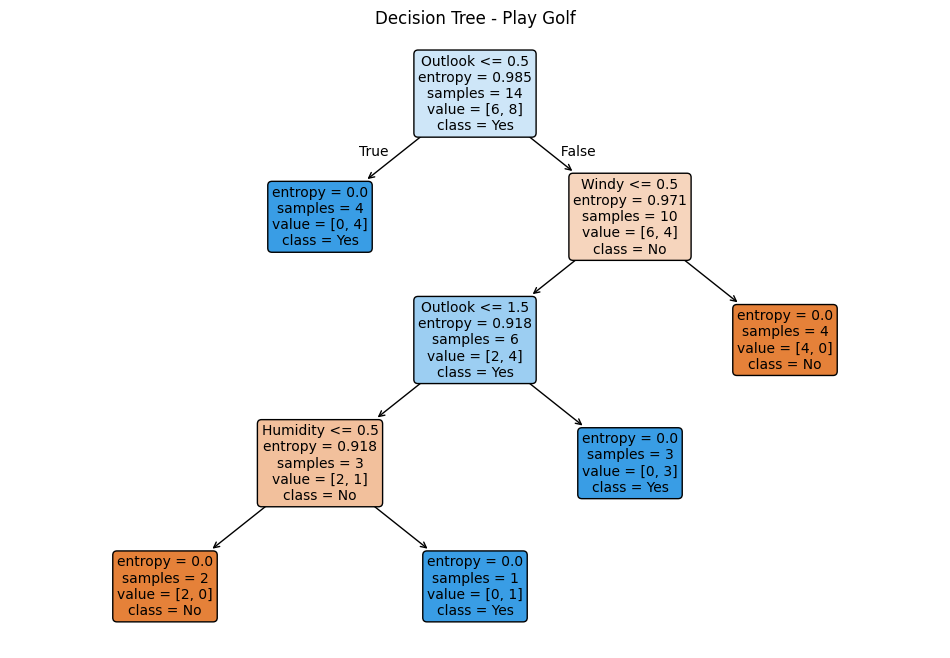

In [ ]:
# Visualisasi pohon (Cell 6)
print("--- Visualisasi Pohon Keputusan ---")
print("Sebuah jendela plot akan muncul.")
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=list(X.columns),
          # class_names=['No', 'Yes'] karena pengkodean label (0=No, 1=Yes)
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Play Golf")
plt.show()